In [86]:
from transformer_model import TransformerModel
import torch

In [130]:
filename1 = "/Users/juliushietala/junction_2020/junction-2020-gubbet-koodaa/speech_recognition/test_audio/test.mp3"
filename2 = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/up/0a7c2a8d_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filename1)

downsample_rate=16000

downsample_resample = torchaudio.transforms.Resample(
    sample_rate, downsample_rate, resampling_method='sinc_interpolation')

waveform = downsample_resample(waveform)
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0
#hamming, hanning, povey (default), rectangular, blackman
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": True,
    "round_to_power_of_two": True,
    "sample_frequency": sample_rate,
    "num_mel_bins": 24
}
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

torch.Size([76, 24])


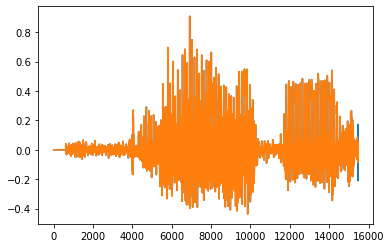

In [131]:
print(fbank.size())
plt.figure()
plt.plot(waveform.t().numpy()[:,:]);

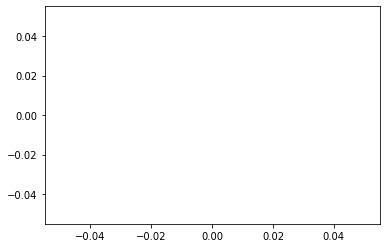

In [113]:
plt.figure()
split_form = waveform[:,30000:38000]
split_form.shape
plt.plot(split_form.numpy().T);

In [114]:
fbank = torchaudio.compliance.kaldi.fbank(split_form, **params)

AssertionError: choose a window size 400 that is [2, 0]

In [115]:
fbank.size()

torch.Size([79, 24])

In [101]:
#torchaudio.save('foo_save.wav', np_form, sample_rate) 

In [102]:
batch_size = 1
bptt = 40

ntoken_embedding = None #len(TEXT.vocab.stoi) # the size of vocabulary # AMOUNT OF COMMANDS
embedding_size = 24 # embedding dimension
nhid = 256 # the dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 6 # the number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 8 # the number of heads in the multiheadattention models
dropout = 0.2
    
model = TransformerModel(ntoken_embedding, embedding_size, nhead, nhid, nlayers, n_outputs=10, ready_embedding=True, dropout=0.2, batch_size=batch_size, bptt=40)
model.load_state_dict(torch.load("/Users/juliushietala/junction_2020/junction-2020-gubbet-koodaa/speech_recognition/transformer/best_model.mdl", map_location=torch.device('cpu')))
src_mask = model.generate_square_subsequent_mask(40)
data = torch.zeros((40,24))
data[:39,:] = fbank
data = data.view((40,1,24))
pred = model(data, src_mask)

In [103]:
print(pred)
print(torch.argmax(pred))

tensor([[ 2.0890,  5.4309,  1.2932, -2.0529,  1.4956,  2.1633,  0.7760, -1.5124,
         -2.1189,  1.2231]], grad_fn=<AddmmBackward>)
tensor(1)


In [155]:
import pandas as pd

df = pd.DataFrame(columns=['index', 'path', 'label'])
root = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/"
ignore = ['_background_noise_', '.DS_Store' ]
n = 0
labels = []
for folder in os.listdir(root):
    if not folder in ignore:
        labels.append(folder)
        for file in os.listdir(root+folder):
            #row = [n, root+folder+"/"+file, folder]
            #df = df.append(row)
            df = df.append({'index': n, 'path': root+folder+"/"+file, 'label': folder}, ignore_index=True)
            n += 1


In [157]:
df.head(-5)

,index,path,label
0,0,/Users/juliushietala/junction_2020/tensorflow-...,right
1,1,/Users/juliushietala/junction_2020/tensorflow-...,right
2,2,/Users/juliushietala/junction_2020/tensorflow-...,right
3,3,/Users/juliushietala/junction_2020/tensorflow-...,right
4,4,/Users/juliushietala/junction_2020/tensorflow-...,right
...,...,...,...
64711,64711,/Users/juliushietala/junction_2020/tensorflow-...,four
64712,64712,/Users/juliushietala/junction_2020/tensorflow-...,four
64713,64713,/Users/juliushietala/junction_2020/tensorflow-...,four
64714,64714,/Users/juliushietala/junction_2020/tensorflow-...,four


In [158]:
labels

['right',
 'eight',
 'cat',
 'tree',
 'bed',
 'happy',
 'go',
 'dog',
 'no',
 'wow',
 'nine',
 'left',
 'stop',
 'three',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'up',
 'marvin',
 'two',
 'house',
 'down',
 'six',
 'yes',
 'on',
 'five',
 'off',
 'four']

In [161]:
df.to_csv("train_data.csv")

In [162]:
labels_df = pd.DataFrame(labels)

In [163]:
labels_df.to_csv("labels.csv")

In [170]:
df_load = pd.read_csv("train_data.csv")

In [171]:
df_load

,Unnamed: 0,index,path,label
0,0,0,/Users/juliushietala/junction_2020/tensorflow-...,right
1,1,1,/Users/juliushietala/junction_2020/tensorflow-...,right
2,2,2,/Users/juliushietala/junction_2020/tensorflow-...,right
3,3,3,/Users/juliushietala/junction_2020/tensorflow-...,right
4,4,4,/Users/juliushietala/junction_2020/tensorflow-...,right
...,...,...,...,...
64716,64716,64716,/Users/juliushietala/junction_2020/tensorflow-...,four
64717,64717,64717,/Users/juliushietala/junction_2020/tensorflow-...,four
64718,64718,64718,/Users/juliushietala/junction_2020/tensorflow-...,four
64719,64719,64719,/Users/juliushietala/junction_2020/tensorflow-...,four


In [172]:
labels

['right',
 'eight',
 'cat',
 'tree',
 'bed',
 'happy',
 'go',
 'dog',
 'no',
 'wow',
 'nine',
 'left',
 'stop',
 'three',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'up',
 'marvin',
 'two',
 'house',
 'down',
 'six',
 'yes',
 'on',
 'five',
 'off',
 'four']

In [177]:
df.head(9000)

,index,path,label
0,0,/Users/juliushietala/junction_2020/tensorflow-...,right
1,1,/Users/juliushietala/junction_2020/tensorflow-...,right
2,2,/Users/juliushietala/junction_2020/tensorflow-...,right
3,3,/Users/juliushietala/junction_2020/tensorflow-...,right
4,4,/Users/juliushietala/junction_2020/tensorflow-...,right
...,...,...,...
8995,8995,/Users/juliushietala/junction_2020/tensorflow-...,bed
8996,8996,/Users/juliushietala/junction_2020/tensorflow-...,bed
8997,8997,/Users/juliushietala/junction_2020/tensorflow-...,bed
8998,8998,/Users/juliushietala/junction_2020/tensorflow-...,bed


In [178]:
labels_df 

,0
0,right
1,eight
2,cat
3,tree
4,bed
5,happy
6,go
7,dog
8,no
9,wow


In [219]:
s1 = torch.tensor([[1,1,1],[1,1,1]])
print(s1.size())
s2 = torch.tensor([[2,2,2],[2,2,2]])
s3 = torch.tensor([[3,3,3],[3,3,3]])
s4 = torch.tensor([[4,4,4],[4,4,4]])
stack = torch.stack((s1,s2,s3,s4), dim=1)
#stuffs = [[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]]
#te = torch.tensor(stuffs)

torch.Size([2, 3])


In [220]:
stack.size()

torch.Size([2, 4, 3])

In [221]:
stack

tensor([[[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4]],

        [[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4]]])

In [231]:
stack.permute(1,0,2).reshape(4,-1)

tensor([[1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4]])

In [223]:
stack.view(3,-1).size()

torch.Size([3, 8])